## Gaining insights and future predictions from **Stock time series data**

### Time Series Analysis of AAPL and MSFT Stocks
This notebook performs time series analysis on two stocks: **Apple (AAPL)** and **Microsoft (MSFT)** using historical price data from Yahoo Finance.

We'll cover:
* Load Data
* Preprocessing(null values)
* Initial plot
* Decompose Time Series → visualize trend/seasonality/residual
* Check for Stationarity (ADF Test, KPSS Test)
* [OPTIONAL] If no clear result is achieved we try transformation and differencing.
* Make Stationary (if needed)
* ACF & PACF plots
* Apply different models which is found out to be suitable with the help of ACF & PACF plots
* Evaluate
* Find the best and a conclusion
* Apply Gairach
* Apply ML

### Importing Libraries and Data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')
tickers = ['AAPL', 'MSFT']

aapl=yf.download('AAPL', start='2024-01-01', end='2025-04-30')
msft = yf.download('MSFT', start='2024-01-01', end='2025-04-30')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Plotting an initial plot for Close Price

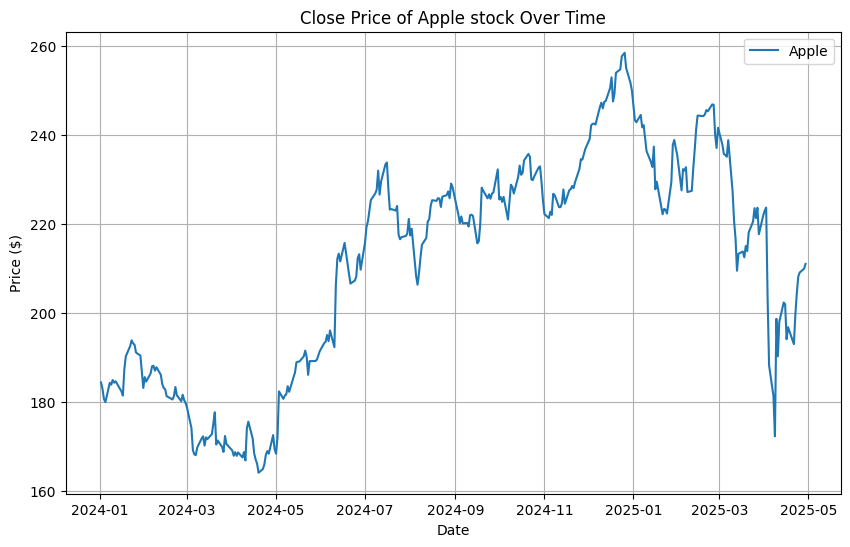

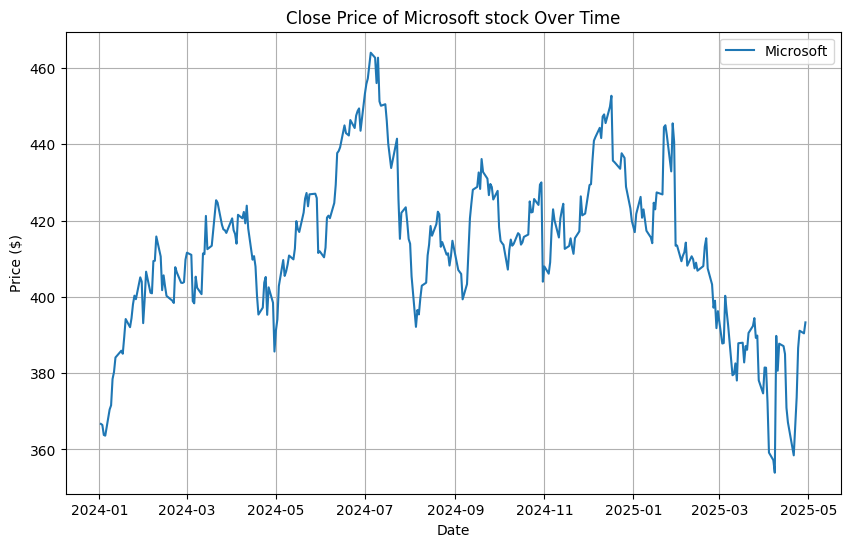

In [15]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(aapl['Close'], label='Apple')
plt.title('Close Price of Apple stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(msft['Close'], label='Microsoft')
plt.title('Close Price of Microsoft stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()


plt.show()

### Time Series Decomposition of Apple

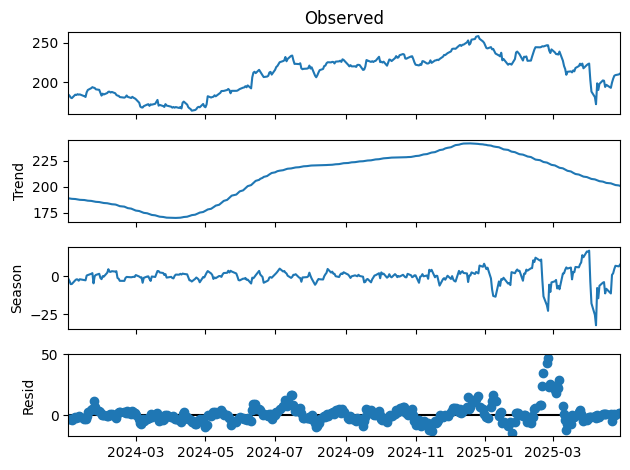

In [2]:
from statsmodels.tsa.seasonal import STL

stl = STL(aapl['Close'], period=30, robust=True)
res = stl.fit()
res.plot()
aapl_trend=res.trend
aapl_seasonal=res.seasonal
aapl_resid=res.resid.dropna()
plt.show()

### Time Series Decomposition of Microsoft

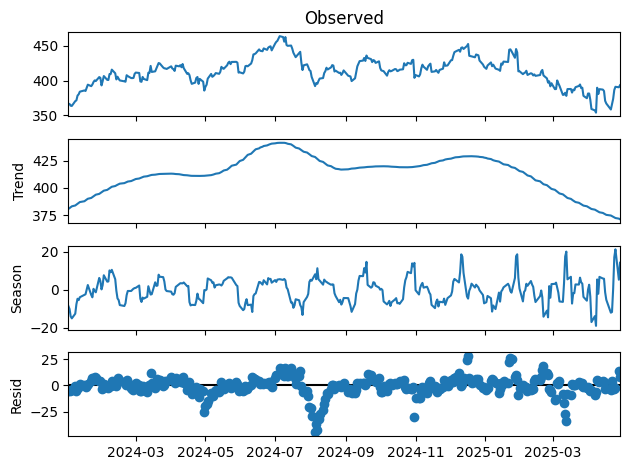

In [29]:
msftstl=STL(msft['Close'], period=30, robust=True)
res1=msftstl.fit()
res1.plot()
msft_trend=res1.trend
msft_seasonal=res1.seasonal
msft_resid=res1.resid.dropna()
plt.show()

### Applying Check for Stationary

In [18]:
print("ADF Test on Apple stock data:")
adf_aapl = adfuller(aapl['Close'])
print(f"ADF Statistic: {adf_aapl[0]}")
p_adf_aapl=adf_aapl[1]
print(f"p-value: {adf_aapl[1]}")

stat, p_kpss_aapl, _, _ = kpss(aapl['Close'], regression='ct')
print(f"KPSS Statistic: {stat}")
print(f"p-value: {p_kpss_aapl}")

if(p_adf_aapl<0.05 and p_kpss_aapl>=0.05):
    print("Stationary")
elif(p_adf_aapl>=0.05 and p_kpss_aapl<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")



ADF Test on Apple stock data:
ADF Statistic: -1.5998257097110238
p-value: 0.4836810212754673
KPSS Statistic: 0.38354311902120675
p-value: 0.01
Not Stationary


In [19]:
print("ADF Test on Microsoft stock data:")
adf_msft = adfuller(msft['Close'])
print(f"ADF Statistic: {adf_msft[0]}")
p_adf_msft=adf_msft[1]
print(f"p-value: {adf_msft[1]}")

stat, p_kpss_msft, _, _ = kpss(msft['Close'], regression='ct')
print(f"KPSS Statistic: {stat}")
print(f"p-value: {p_kpss_msft}")

if(p_adf_msft<0.05 and p_kpss_msft>=0.05):
    print("Stationary")
elif(p_adf_msft>=0.05 and p_kpss_msft<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")



ADF Test on Microsoft stock data:
ADF Statistic: -3.102133540445143
p-value: 0.02639569931326921
KPSS Statistic: 0.3859029502725162
p-value: 0.01
Cannot be concluded.


### Making the stock data stationary

In [20]:
# ✅ Summary Cheat Sheet
# Condition	Fix
# Trend only	First-order differencing
# Increasing variance	Log transform
# Seasonal pattern	Seasonal differencing
# Both trend + seasonality	Combined differencing or STL
# Complex/unknown	Try STL decomposition

#### Using STL Residuals as it has no trend or seasonality so it is stationary
#### Now will be applying stationary tests again on the residuals

In [21]:
print("ADF Test on Apple stock data:")
adf_aapl_resid = adfuller(aapl_resid)
print(f"ADF Statistic: {adf_aapl_resid[0]}")
p_adf_aapl_resid=adf_aapl_resid[1]
print(f"p-value: {adf_aapl_resid[1]}")

stat_resid, p_kpss_aapl_resid, _resid, _resid1 = kpss(aapl_resid, regression='c')
print(f"KPSS Statistic: {stat_resid}")
print(f"p-value: {p_kpss_aapl_resid}")

if(p_adf_aapl_resid<0.05 and p_kpss_aapl_resid>=0.05):
    print("Stationary")
elif(p_adf_aapl_resid>=0.05 and p_kpss_aapl_resid<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")

print("\n----------------------------------------------------------------------------------------------------------------------\n")
print("ADF Test on Microsoft stock data:")
adf_msft_resid = adfuller(msft_resid)
print(f"ADF Statistic: {adf_msft_resid[0]}")
p_adf_msft_resid=adf_msft_resid[1]
print(f"p-value: {adf_msft_resid[1]}")

stat_resid, p_kpss_msft_resid, _resid, _resid1 = kpss(msft_resid, regression='c')
print(f"KPSS Statistic: {stat_resid}")
print(f"p-value: {p_kpss_msft_resid}")

if(p_adf_msft_resid<0.05 and p_kpss_msft_resid>=0.05):
    print("Stationary")
elif(p_adf_msft_resid>=0.05 and p_kpss_msft_resid<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")

ADF Test on Apple stock data:
ADF Statistic: -5.001265730271733
p-value: 2.2065500172976536e-05
KPSS Statistic: 0.29502239439671873
p-value: 0.1
Stationary

----------------------------------------------------------------------------------------------------------------------

ADF Test on Microsoft stock data:
ADF Statistic: -5.7880242353466
p-value: 4.946821987348904e-07
KPSS Statistic: 0.06353553273595249
p-value: 0.1
Stationary


#### Now the data is Stationary, will be plotting ACF & PACF Plots

### ACF & PACF Plots

<Figure size 1000x400 with 0 Axes>

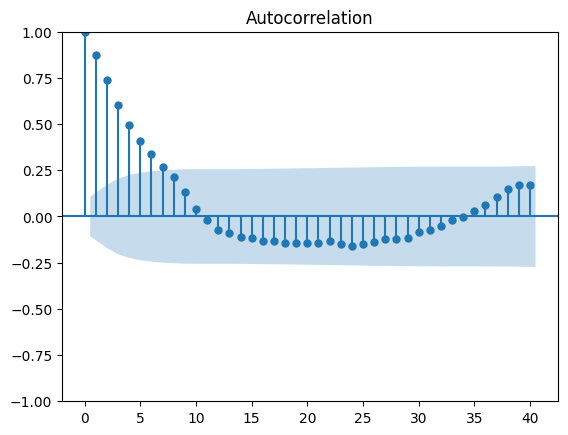

<Figure size 1000x400 with 0 Axes>

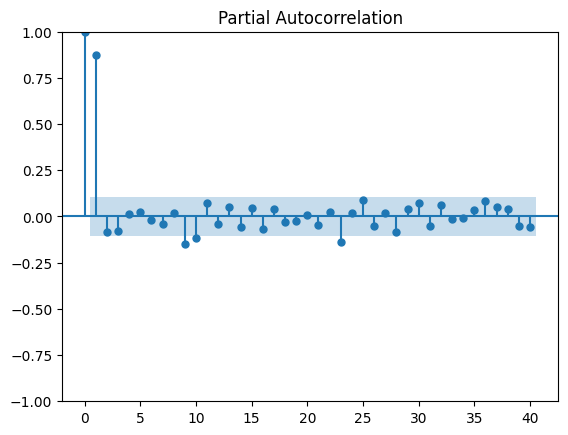

In [22]:
plt.figure(figsize=(10, 4))
plot_acf(aapl_resid, lags=40)
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(aapl_resid, lags=40)
plt.show()


<Figure size 1000x400 with 0 Axes>

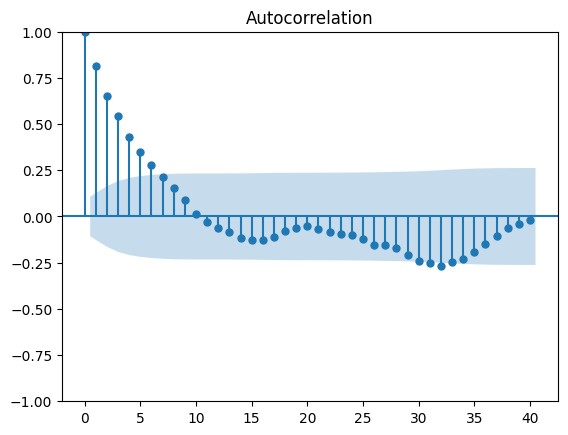

<Figure size 1000x400 with 0 Axes>

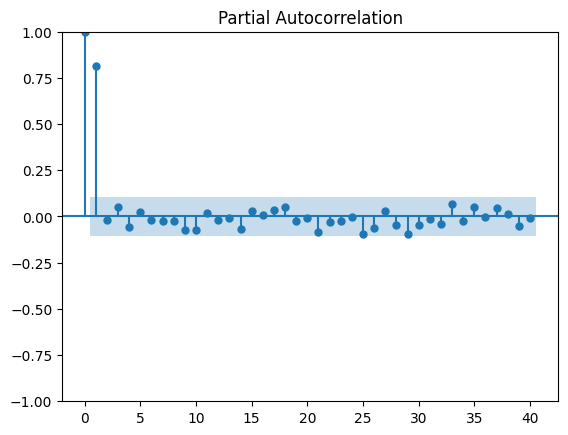

In [23]:
plt.figure(figsize=(10, 4))
plot_acf(msft_resid, lags=40)
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(msft_resid, lags=40)
plt.show()


### Fitting AR model according to ACF & PACF plots

In [24]:
from statsmodels.tsa.arima.model import ARIMA

model1_aapl = ARIMA(aapl_resid, order=(2, 0, 0))
fit1_aapl = model1_aapl.fit()
print(fit1_aapl.summary())


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  332
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -894.088
Date:                Tue, 10 Jun 2025   AIC                           1796.177
Time:                        12:12:43   BIC                           1811.397
Sample:                             0   HQIC                          1802.247
                                - 332                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2316      1.614      0.763      0.445      -1.932       4.395
ar.L1          0.9427      0.033     28.242      0.000       0.877       1.008
ar.L2         -0.0838      0.037     -2.241      0.0

In [42]:
residual_forecast_aapl = (fit1_aapl.forecast(steps=30))


In [32]:
model1_msft = ARIMA(msft_resid, order=(2, 0, 0))
fit1_msft = model1_msft.fit()
print(fit1_msft.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  332
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1021.790
Date:                Tue, 10 Jun 2025   AIC                           2051.581
Time:                        13:28:46   BIC                           2066.801
Sample:                             0   HQIC                          2057.651
                                - 332                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4374      1.569     -0.279      0.780      -3.513       2.638
ar.L1          0.8251      0.045     18.200      0.000       0.736       0.914
ar.L2         -0.0155      0.053     -0.294      0.7

In [44]:
residual_forecast_msft = (fit1_msft.forecast(steps=30))


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_trend_aapl = ExponentialSmoothing(aapl_trend.dropna(), trend='additive', seasonal=None)
fit_trend_aapl = model_trend_aapl.fit()
trend_forecast_aapl = fit_trend_aapl.forecast(30)


seasonal_period = 30  # or whatever your STL period was
seasonal_pattern_aapl = aapl_seasonal[-seasonal_period:].values
seasonal_forecast_aapl = np.tile(seasonal_pattern_aapl, int(np.ceil(30 / seasonal_period)))[:30]
final_forecast_aapl = trend_forecast_aapl + seasonal_forecast_aapl + residual_forecast_aapl

[*********************100%***********************]  1 of 1 completed


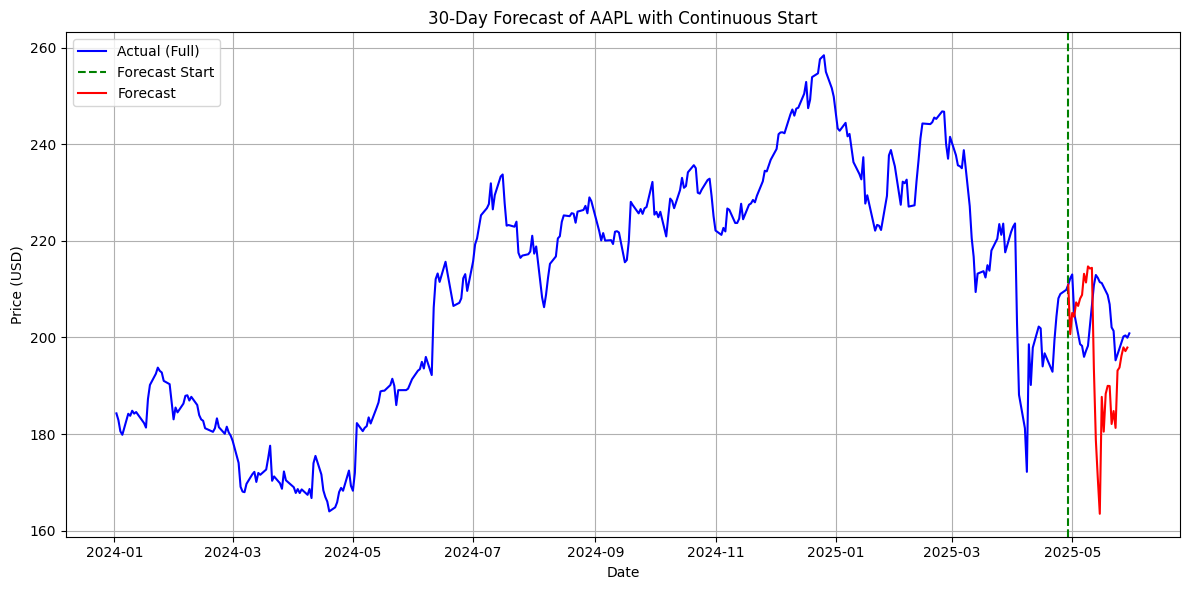

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download actual AAPL data
aapl_actual = yf.download('AAPL', start='2024-01-01', end='2025-05-31')

# Assuming 'aapl' is your original training data (not the same as 'aapl_actual')
last_date = aapl.index[-1]
last_value = aapl['Close'].iloc[-1]

# Forecast: create future dates and predicted values (assuming `predicted` already defined)
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Combine last actual point with forecast to make it continuous
extended_index = np.insert(forecast_index, 0, last_date)
extended_forecast = np.insert(final_forecast_aapl, 0, last_value)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aapl_actual['Close'], label='Actual (Full)', color='blue')
plt.axvline(x=last_date, color='green', linestyle='--', label='Forecast Start')
plt.plot(extended_index, extended_forecast, label='Forecast', color='red')

plt.title("30-Day Forecast of AAPL with Continuous Start")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [68]:
# Get next 30 trading days after the last available date
forecast_index = aapl_actual.index[aapl_actual.index > aapl.index[-1]][:30]
# Ensure forecast_index uses only valid trading dates
forecast_index = aapl_actual.index[aapl_actual.index > aapl.index[-1]][:30]
final_forecast_aapl = final_forecast_aapl.values
# Actual vs predicted comparison
actual_forecast_values = aapl_actual.loc[forecast_index, 'Close'].values
predicted = final_forecast_aapl[:len(actual_forecast_values)]

# MAPE Calculation
mape = np.mean(np.abs((actual_forecast_values - final_forecast_aapl) / actual_forecast_values)) * 100
print(f"MAPE for 30-day forecast: {mape:.2f}%")


MAPE for 30-day forecast: 6.49%


### Fitting GARCH Model to the data

In [58]:
returns = 100 * np.log(aapl['Close'] / aapl['Close'].shift(1)).dropna()

from arch import arch_model

# Fit a GARCH(1,1) model on returns
garch_model = arch_model(returns, vol='GARCH', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 286523832.8351184
Iteration:      2,   Func. Count:     13,   Neg. LLF: 166745.9079302795
Iteration:      3,   Func. Count:     20,   Neg. LLF: 675.3894083915368
Iteration:      4,   Func. Count:     26,   Neg. LLF: 814.9125327588663
Iteration:      5,   Func. Count:     32,   Neg. LLF: 648.2648360790081
Iteration:      6,   Func. Count:     38,   Neg. LLF: 641.5814542279137
Iteration:      7,   Func. Count:     43,   Neg. LLF: 641.5805063406737
Iteration:      8,   Func. Count:     48,   Neg. LLF: 641.5804957504913
Iteration:      9,   Func. Count:     52,   Neg. LLF: 641.580495750579
Optimization terminated successfully    (Exit mode 0)
            Current function value: 641.5804957504913
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                 

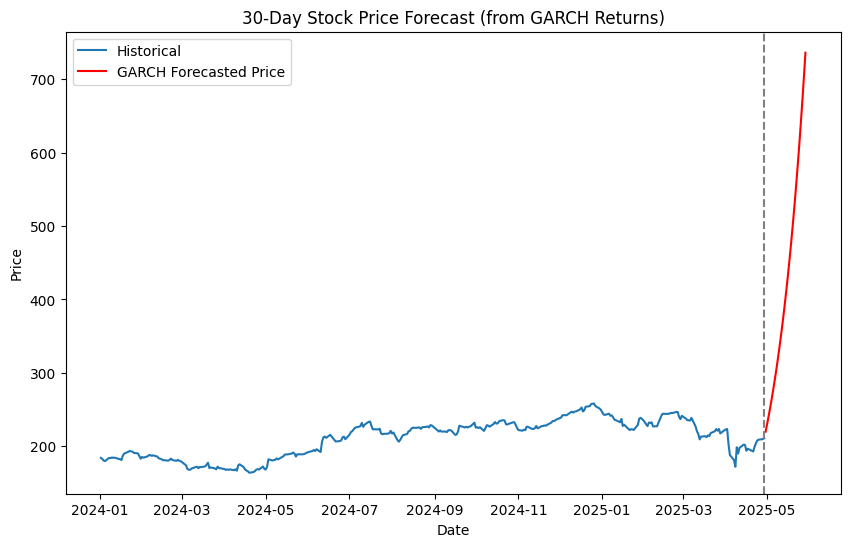

In [60]:
# Forecast mean and variance for 30 days
garch_forecast = garch_fit.forecast(horizon=30)
mean_forecast = garch_forecast.mean.values[-1, :]  # These are the returns

import numpy as np

# Start from last known price
last_price = aapl['Close'].iloc[-1]

# Cumulative log return to actual prices
forecasted_prices = [last_price]
for ret in mean_forecast:
    next_price = forecasted_prices[-1] * np.exp(ret)
    forecasted_prices.append(next_price)

# Remove the first price (initial value)
forecasted_prices = forecasted_prices[1:]
import matplotlib.pyplot as plt
import pandas as pd

forecast_index = pd.date_range(start=aapl.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

plt.figure(figsize=(10, 6))
plt.plot(aapl['Close'], label='Historical')
plt.plot(forecast_index, forecasted_prices, label='GARCH Forecasted Price', color='red')
plt.axvline(x=aapl.index[-1], color='gray', linestyle='--')
plt.legend()
plt.title('30-Day Stock Price Forecast (from GARCH Returns)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [61]:
print(mean_forecast)


[0.04166098 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098
 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098
 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098
 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098
 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098 0.04166098]


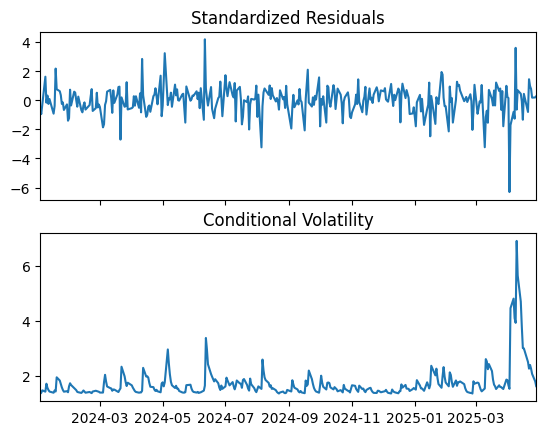

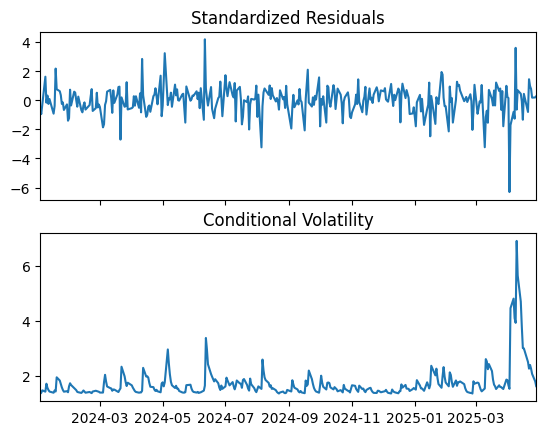

In [62]:
forecasted_prices = [last_price]
for ret in mean_forecast:
    next_price = forecasted_prices[-1] * np.exp(ret)
    forecasted_prices.append(next_price)
garch_fit.plot()